<a href="https://colab.research.google.com/github/MarileideSoaresSilva/Leide/blob/main/Checkout4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#=> Importando as Bibliotecas que serão necessárias para a análise exploratória.

In [1]:
from google.colab import files

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#=> Carregando os dados:

In [2]:
import io
uploaded = files.upload()


Saving housing.csv to housing.csv


#=> Leitura dos dados:

In [5]:
df = pd.read_csv(io.BytesIO(uploaded['housing.csv']))
print(df.head())

  longitude;latitude;housing_median_age;total_rooms;total_bedrooms;population;households;median_income;median_house_value;ocean_proximity
0  -122.23;37.88;41.0;880.0;129.0;322.0;126.0;83....                                                                                     
1  -122.22;37.86;21.0;7099.0;1106.0;2401.0;1138.0...                                                                                     
2  -122.24;37.85;52.0;1467.0;190.0;496.0;177.0;72...                                                                                     
3  -122.25;37.85;52.0;1274.0;235.0;558.0;219.0;56...                                                                                     
4  -122.25;37.85;52.0;1627.0;280.0;565.0;259.0;38...                                                                                     


#=> Obtendo informações sobre o DataFrame:

In [6]:
df = pd.read_csv('housing.csv', sep=';')  # Separa tudo usando ponto-virgula
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         83.252            452600.0        NEAR BAY  
1      2401.0      1138.0         83.014            358500.0        NEAR BAY  
2       496.0       177.0         72.574            352100.0        NEAR BAY  
3       558.0       219.0         56.431            341300.0        NEAR BAY  
4       565.0       259.0         38.462            342200.0        NEAR BAY  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#=> Transformando dados Booleanos em Inteiros:

In [8]:
# Definindo o "mapping dictionary":
mapping = {
    '<1H OCEAN': 1,
    'INLAND': 2,
    'ISLAND': 3,
    'NEAR BAY': 4,
    'NEAR OCEAN': 5
}

# Criando nova coluna para usar o "mapping":
df['ocean_proximity_num'] = df['ocean_proximity'].replace(mapping)

print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         83.252            452600.0        NEAR BAY   
1      2401.0      1138.0         83.014            358500.0        NEAR BAY   
2       496.0       177.0         72.574            352100.0        NEAR BAY   
3       558.0       219.0         56.431            341300.0        NEAR BAY   
4       565.0       259.0         38.462            342200.0        NEAR BAY   

   ocean_proximity_num  
0                    4  
1                 

<ipython-input-8-6c8954f63d38>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ocean_proximity_num'] = df['ocean_proximity'].replace(mapping)


In [29]:
# Removendo a coluna original 'ocean_proximity'(opcional - Caso seja necessário)
#df = df.drop('ocean_proximity', axis=1)

#print(df.head())

#=> Calculando estatísticas descritivas:

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_num
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,33.656011,206855.816909,2.165843
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,21.858967,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,19.955750,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,31.875000,179700.000000,2.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,45.180500,264725.000000,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,150.001000,500001.000000,5.000000


#=>	Explorando histograma de cada variável individualmente para entender sua distribuição e características:

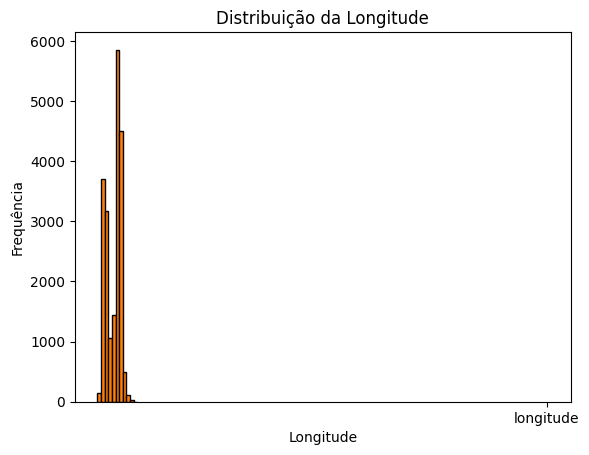

In [10]:
plt.hist('longitude')
plt.hist(df['longitude'], bins=np.arange(int(min(df['longitude'])), int(max(df['longitude'])) + 2, 1), edgecolor='black')
plt.xlabel('Longitude')
plt.ylabel('Frequência')
plt.title('Distribuição da Longitude')
plt.show()

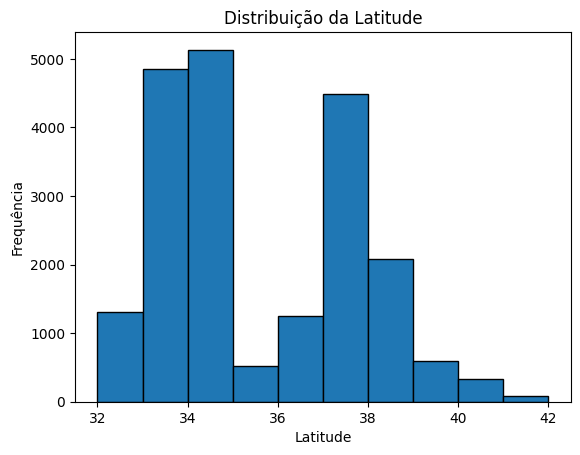

In [11]:
plt.hist(df['latitude'], bins=np.arange(int(min(df['latitude'])), int(max(df['latitude'])) + 2, 1), edgecolor='black') #Necessário transformar dados float em int;
plt.xlabel('Latitude')
plt.ylabel('Frequência')
plt.title('Distribuição da Latitude')
plt.show()

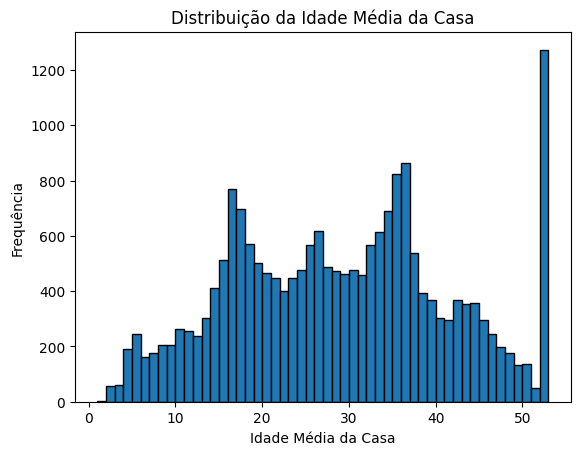

In [12]:
plt.hist(df['housing_median_age'], bins=np.arange(int(min(df['housing_median_age'])), int(max(df['housing_median_age'])) + 2, 1), edgecolor='black')
plt.xlabel('Idade Média da Casa')
plt.ylabel('Frequência')
plt.title('Distribuição da Idade Média da Casa')
plt.show()

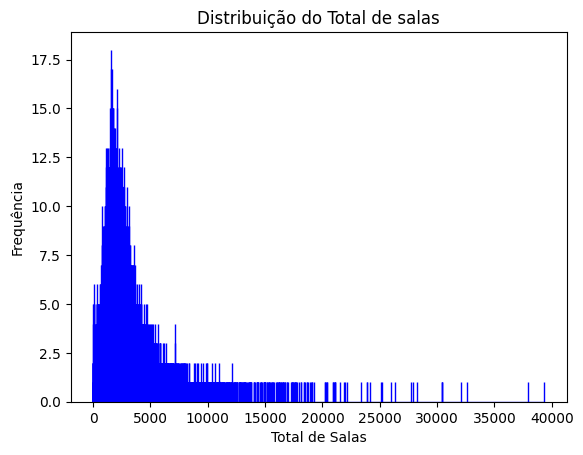

In [13]:
plt.hist(df['total_rooms'], bins=np.arange(int(min(df['total_rooms'])), int(max(df['total_rooms'])) + 2, 1), edgecolor='blue')
plt.xlabel('Total de Salas')
plt.ylabel('Frequência')
plt.title('Distribuição do Total de salas')
plt.show()

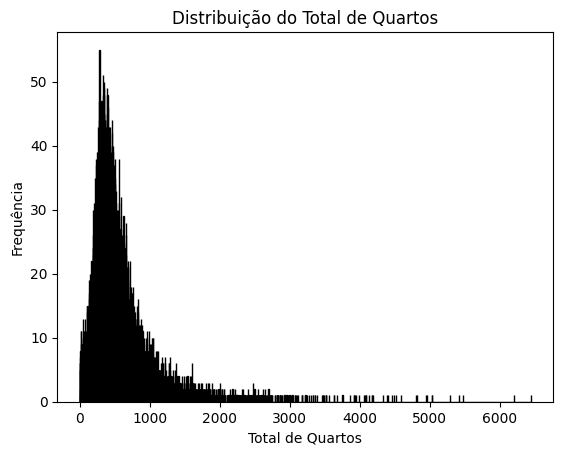

In [14]:
plt.hist(df['total_bedrooms'], bins=np.arange(int(min(df['total_bedrooms'])), int(max(df['total_bedrooms'])) + 2, 1), edgecolor='black')
plt.xlabel('Total de Quartos')
plt.ylabel('Frequência')
plt.title('Distribuição do Total de Quartos')
plt.show()

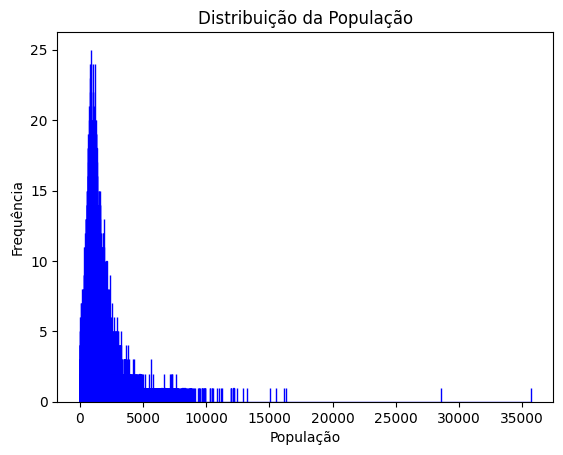

In [15]:
plt.hist(df['population'], bins=np.arange(int(min(df['population'])), int(max(df['population'])) + 2, 1), edgecolor='blue')
plt.xlabel('População')
plt.ylabel('Frequência')
plt.title('Distribuição da População')
plt.show()

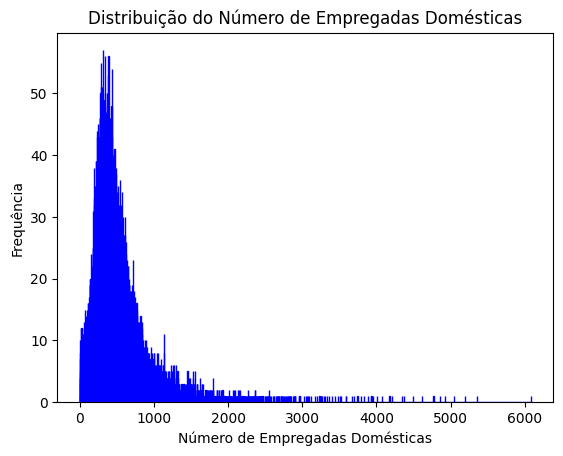

In [16]:
plt.hist(df['households'], bins=np.arange(int(min(df['households'])), int(max(df['households'])) + 2, 1), edgecolor='blue')
plt.xlabel('Número de Empregadas Domésticas')
plt.ylabel('Frequência')
plt.title('Distribuição do Número de Empregadas Domésticas')
plt.show()

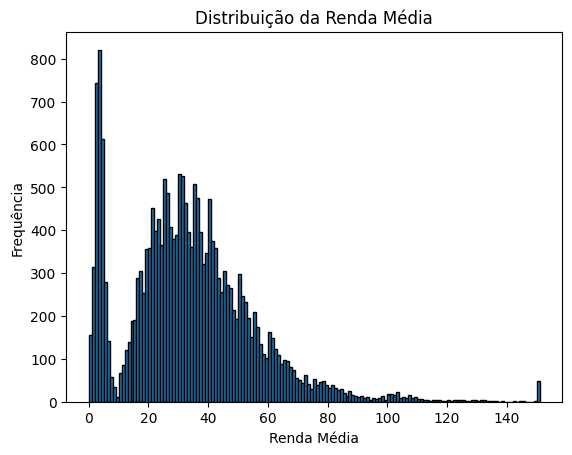

In [17]:
plt.hist(df['median_income'], bins=np.arange(int(min(df['median_income'])), int(max(df['median_income'])) + 2, 1), edgecolor='black')
plt.xlabel('Renda Média')
plt.ylabel('Frequência')
plt.title('Distribuição da Renda Média')
plt.show()

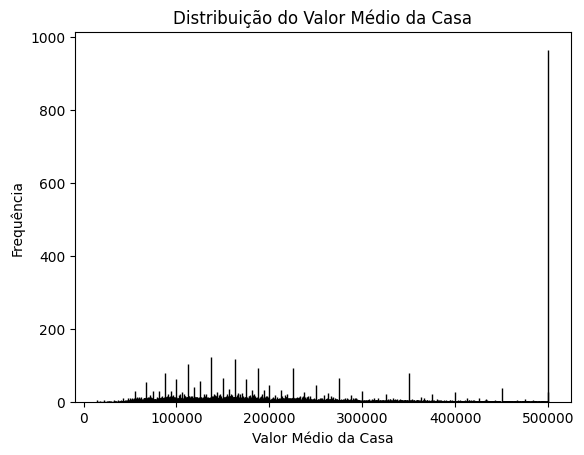

In [18]:
plt.hist(df['median_house_value'], bins=np.arange(int(min(df['median_house_value'])), int(max(df['median_house_value'])) + 2, 1), edgecolor='black')
plt.xlabel('Valor Médio da Casa')
plt.ylabel('Frequência')
plt.title('Distribuição do Valor Médio da Casa')
plt.show()

#=> Gráficos de Dispersão:

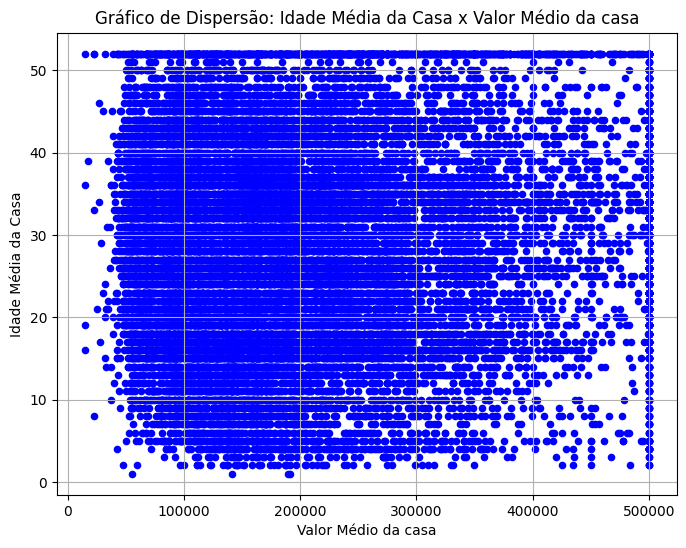

In [54]:
plt.figure(figsize=(8, 6)) # Define o tamanho da figura (opcional)
plt.scatter(df['median_house_value'], df['housing_median_age'], marker='o', s=20, c='blue') # cria o gráfico de dispersão
plt.xlabel('Valor Médio da casa')
plt.ylabel('Idade Média da Casa')
plt.title('Gráfico de Dispersão: Idade Média da Casa x Valor Médio da casa')
plt.grid(True) # Adiciona uma grade (opcional)
plt.show()

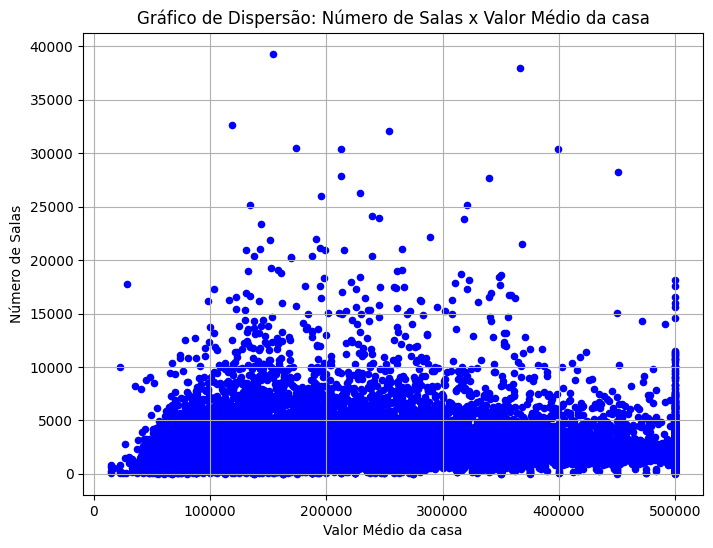

In [19]:
plt.figure(figsize=(8, 6)) # Define o tamanho da figura (opcional)
plt.scatter(df['median_house_value'], df['total_rooms'], marker='o', s=20, c='blue') # cria o gráfico de dispersão
plt.xlabel('Valor Médio da casa')
plt.ylabel('Número de Salas')
plt.title('Gráfico de Dispersão: Número de Salas x Valor Médio da casa')
plt.grid(True) # Adiciona uma grade (opcional)
plt.show()

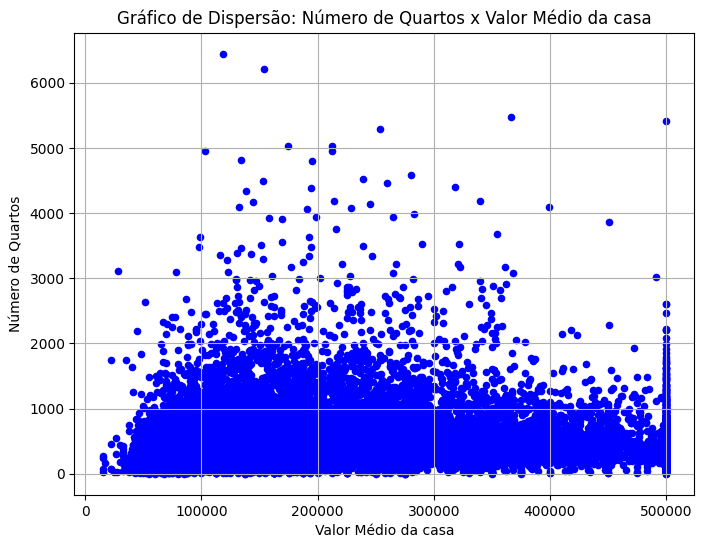

In [20]:
plt.figure(figsize=(8, 6)) # Define o tamanho da figura (opcional)
plt.scatter(df['median_house_value'], df['total_bedrooms'], marker='o', s=20, c='blue') # cria o gráfico de dispersão
plt.xlabel('Valor Médio da casa')
plt.ylabel('Número de Quartos')
plt.title('Gráfico de Dispersão: Número de Quartos x Valor Médio da casa')
plt.grid(True) # Adiciona uma grade (opcional)
plt.show()

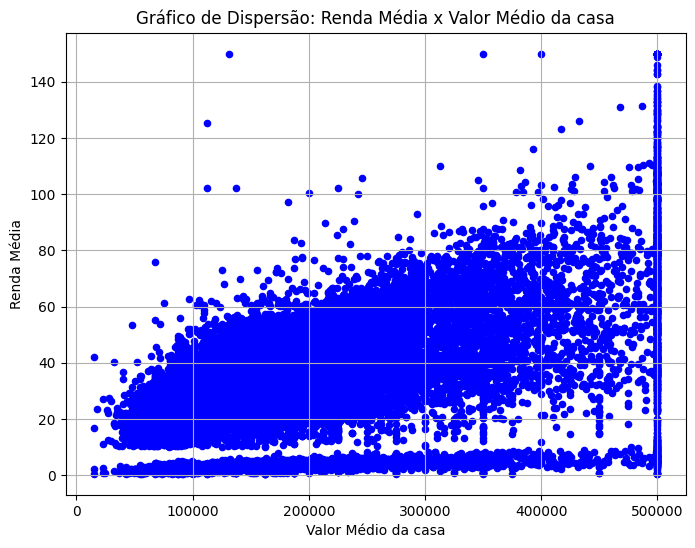

In [22]:
plt.figure(figsize=(8, 6)) # Define o tamanho da figura (opcional)
plt.scatter(df['median_house_value'], df['median_income'], marker='o', s=20, c='blue') # cria o gráfico de dispersão
plt.xlabel('Valor Médio da casa')
plt.ylabel('Renda Média')
plt.title('Gráfico de Dispersão: Renda Média x Valor Médio da casa')
plt.grid(True) # Adiciona uma grade (opcional)
plt.show()

#=> Gráficos Boxplots:

#1.   Relação entre Proximidade da Praia e Renda Média


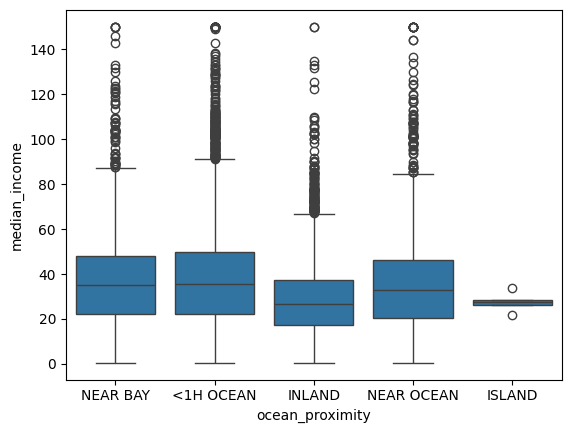

In [23]:
sns.boxplot(x='ocean_proximity', y='median_income', data=df)
plt.show()


#2.   Relação entre Proximidade da Praia e Valor Médio da Casa

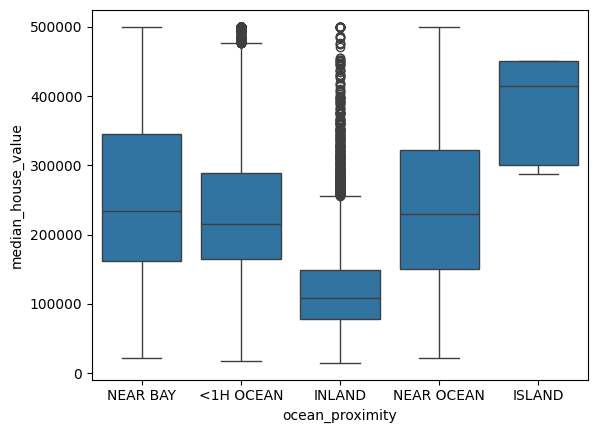

In [24]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.show()


#Utilizando o Algoritmo K-means com Scikit-learn para Identificar Clusters:

In [25]:
#Importando Bibliotecas Necessárias
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [26]:
# Removendo a coluna original 'ocean_proximity'(opcional) - This line is causing the error as it is executed
df = df.drop('ocean_proximity', axis=1)

print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         83.252            452600.0   
1      2401.0      1138.0         83.014            358500.0   
2       496.0       177.0         72.574            352100.0   
3       558.0       219.0         56.431            341300.0   
4       565.0       259.0         38.462            342200.0   

   ocean_proximity_num  
0                    4  
1                    4  
2                    4  
3                    4  
4                    4  


#=> Determinando o Número de k Utilizando o Regra do Cotovelo:

In [27]:
inercias = []
k_valores = range(1, 11) # Testando de k=1 a k=14



In [28]:
!pip install scikit-learn #Instalando Scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans



In [49]:
inercias = []
k_valores = range(1, 11) # Testando de k=1 a k=10

In [50]:
for k in k_valores:
    kmeans = KMeans(n_clusters=k, random_state=42) # random_state garante reprodutibilidade


#=> Utilizando o Atributo "media_house_value" para determinar k pelo Metodo do Cotovelo:

In [56]:
for k in k_valores:
    kmeans = KMeans(n_clusters=k, random_state=42) # random_state garante reprodutibilidade
    kmeans.fit(df[['median_house_value']])  # Pass the data as a DataFrame or array
    inercias.append(kmeans.inertia_)

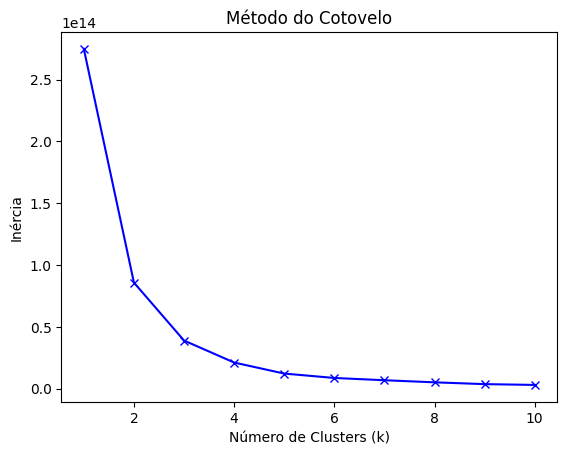

In [57]:
plt.plot(k_valores, inercias, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

#=> Acessando os rótulos dos clusters atribuídos a cada ponto de dado.

In [58]:
labels = kmeans.labels_


#=>	Adicionando os rótulos ao DataFrame original para análise posterior.

In [59]:
df['cluster'] = labels

#=> Usando um scatter plot para visualizar os clusters em duas dimensões:

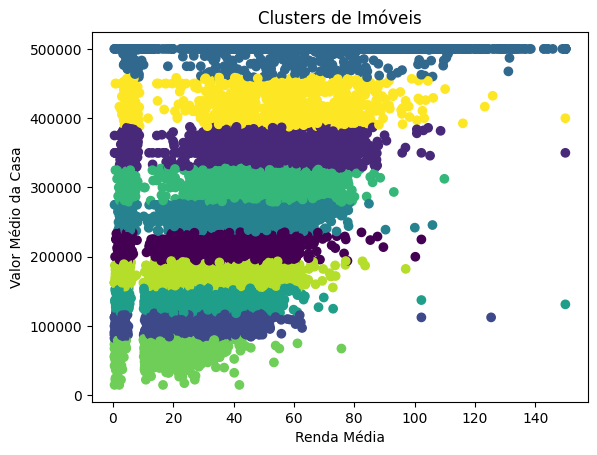

In [60]:
plt.scatter(df['median_income'], df['median_house_value'], c=df['cluster'])
plt.xlabel('Renda Média')
plt.ylabel('Valor Médio da Casa')
plt.title('Clusters de Imóveis')
plt.show()